# Implementacion de un filtro trapezoidal


Aqui ira la teoria y las ecuaciones de diseño del filtro
.
.
.

refferencias:

- Improvement in Trapezoidal Pulse Shaping Pile-Up in Nuclear Signal Processing
- VHDL Simulation of Trapezoidal Filter for Digital Nuclear Spectroscopy systems


### Conformacion de las señales exponenciales de eventos

Tipicamente los eventos de interaccion nuclear generan una señal del tipo exponencial la cual desea ser representada por el filtro trapezoidal, 

A continuacion se construira la señal a ser evaluada

In [96]:
# Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

- Ecuacion en el continuo
$$X_{amp} = \frac{Q}{Cf}e^{-\frac{t}{\tau}}u(t)$$

- Ecuacion discreta
$$X_{amp} = \frac{Q}{Cf}\frac{1}{1-d z^{-1}}$$

In [85]:
Q = 1  # Carga del detector
Cf = 1 # Capacitancia del detector
tao = 1/5 # constante de tiempo en segundos
Ts = 0.001 # Periodo de muestreo

d = np.exp(-Ts/tao)

t = np.arange(0,10,Ts)
delay = 5

In [86]:
def x_amp(A, delay):
    return A*(Q/Cf)*np.exp(-((t-delay)/tao))*np.heaviside(t-delay, 1)

In [87]:
x = x_amp(1,delay)

<function matplotlib.pyplot.show(close=None, block=None)>

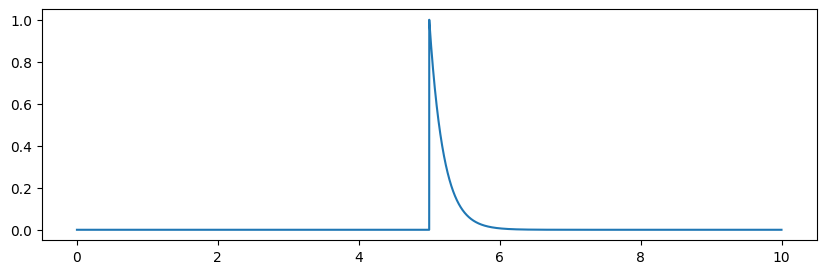

In [88]:
plt.figure(figsize=(10,3))
plt.plot(t,x)
plt.show

## Implementacion del filtro trapezoidal

In [89]:
ta = 0.05
tb = 0.15
tc = 0.2 # ta + tb
na = int(ta/Ts)
nb = int(tb/Ts)
nc = int(tc/Ts)

In [111]:
print("na = ", na)
print("nb = ", nb)
print("nc = ", nc)

na =  50
nb =  150
nc =  200


In [90]:
def traps(x):
    y = np.zeros(len(x))
    for n in range(nc+2,len(x)):
        a1 = x[n-1] - x[n-na-1] - x[n-nb-1] + x[n-nc-1]
        b1 = - d*(x[n-2] - x[n-na-2] - x[n-nb-2] + x[n-nc-2])
        c1 = na*(2*y[n-1] - y[n-2])

        y[n] = (a1 + b1 + c1) / na

    return y

In [91]:
y = traps(x)

<function matplotlib.pyplot.show(close=None, block=None)>

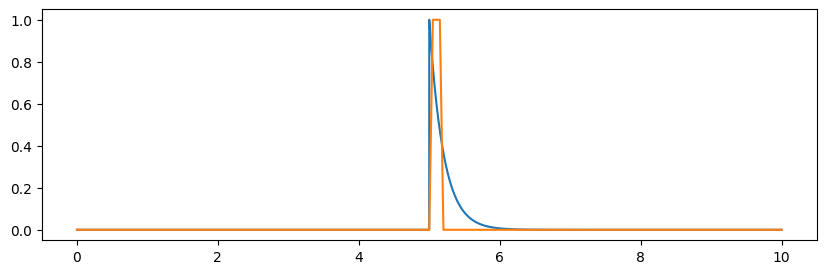

In [92]:
plt.figure(figsize=(10,3))
plt.plot(t,x)
plt.plot(t,y)
plt.show

Ejemplo cn multiples pulsos

In [93]:
x = x_amp(0.5,1) + x_amp(0.5,2) + x_amp(0.55,3) + x_amp(0.4,3.2) + x_amp(0.6,5) + x_amp(0.8,5.5)+ x_amp(0.4,6)+ x_amp(0.6,7)+ x_amp(0.5,8)+ x_amp(0.5,9)
    

<function matplotlib.pyplot.show(close=None, block=None)>

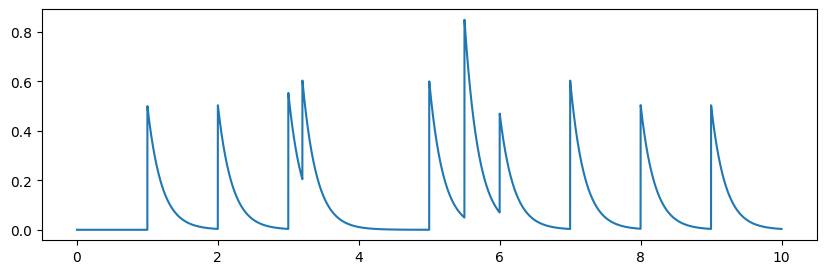

In [105]:
plt.figure(figsize=(10,3))
plt.plot(t,x)
plt.show

In [109]:
data = np.round(x * 2**12).astype(int)
df = pd.DataFrame(data)
df.to_csv('data.csv', index=False)

<function matplotlib.pyplot.show(close=None, block=None)>

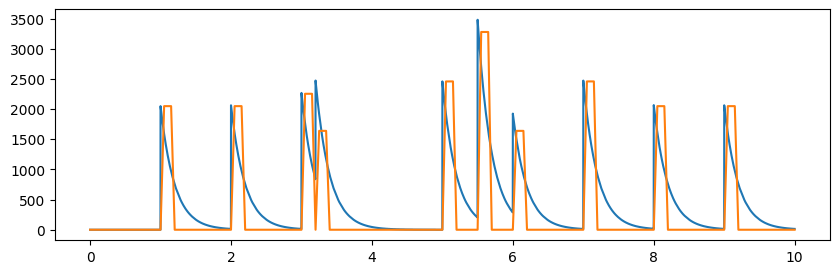

In [110]:
y = traps(data)
plt.figure(figsize=(10,3))
plt.plot(t,data)
plt.plot(t,y)
plt.show

![image](images/im3.jpeg)
![image](images/im2.jpeg)
![image](images/im1.jpeg)